# <b> Chi Square </b>

In [2]:
from scipy.stats.contingency import expected_freq
from scipy.stats import power_divergence
import pandas as pd
import numpy as np
import warnings

data = pd.read_csv('../E clerx/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
lambdas = [
    'pearson', 'log-likelihood', 'freeman-tukey',
    'mod-log-likelihood', 'neyman', 'cressie-read'
]

def chi2(data, x, y):    
    observed = pd.crosstab(data[x], data[y])
    expected = pd.DataFrame(expected_freq(observed))
    expected.columns = observed.columns
    expected.index = observed.index
    
    if (observed < 5).sum().sum() > 0 or (expected < 5).sum().sum() > 0:
        # An often quoted guideline for the validity of this
        # calculation is that the test should be used only if
        # the observed and expected frequencies in each cell
        # are at least 5. (from SciPy docs)
        warnings.warn('Low count on observed or expected frequencies.')
    
    dof = expected.size - sum(expected.shape) + expected.ndim - 1
    delta_dof = observed.size - 1 - dof
    
    if dof == 0:
        tests = [{'lambda':'any', 'chi2':0, 'p':1}]
    else:
        if dof == 1:
            # Adjust `observed` according to Yates' correction for continuity.
            observed = observed + 0.5 * np.sign(expected - observed)
        tests = []
        for lambda_ in lambdas:
            chi2, p = power_divergence(
                observed, expected, ddof=delta_dof,
                axis=None, lambda_=lambda_)
            tests.append({'lambda':lambda_, 'chi2':chi2, 'p':p})
    tests = pd.DataFrame(tests)[['lambda', 'chi2', 'p']]
    return expected, observed, dof, tests

# <b> Evaluating the sex column </b>

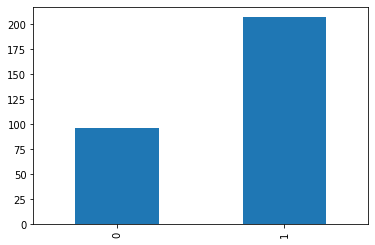

In [7]:
data['sex'].value_counts(ascending=True).plot(kind='bar')

# There are more men than women on the dataset. So, if the null hypothesis is true, we should expect proportionally more men with heart diseases than women

In [9]:
expected, observed, dof, tests = chi2(data, 'sex', 'target')

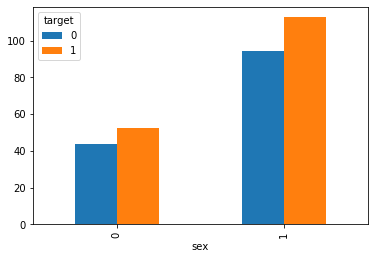

In [10]:
expected.plot(kind='bar')

# There is a noticeable difference. Women seem to be more vulnerable to heart diseases.

The chi-squared hypothesis tests should be sensitive to this. Let's take a look.

In [11]:
tests

,lambda,chi2,p
0,pearson,22.717227,1.876778e-06
1,log-likelihood,23.557374,1.212439e-06
2,freeman-tukey,24.219622,8.595211e-07
3,mod-log-likelihood,25.071078,5.525544e-07
4,neyman,27.457956,1.605471e-07
5,cressie-read,22.931427,1.678845e-06


### Very low p-values, indeed. The sex column qualifies as a good predictor for heart diseases on this dataset.

# Sampling Distribution and Central Limit Theorem

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
df = pd.read_csv("C:\\Users\\User\\Desktop\\Internship\\heart.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### As, we could see all the columns have equal numbers of row data, hence, there is no missing data.

### For illustration of Central Limit Theorem for sampling we will take "chol" cholestrol column.

### We are assuming the column "chol" is normally distributed. Normally distributed means upon giving graphical representation produces a bell shaped distribution.

In [2]:
df_chol = df['chol']
df_chol.describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

In [3]:
# let's take out the mean of the chol data
df_chol.mean()

246.26402640264027

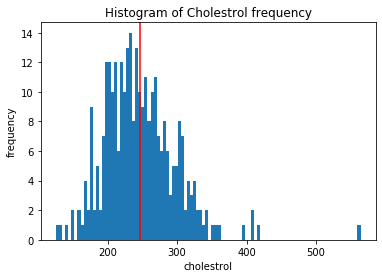

In [4]:
# plot all the observation in chol data
plt.hist(df_chol, bins=100)

plt.xlabel('cholestrol')
plt.ylabel('frequency')
plt.title('Histogram of Cholestrol frequency')
plt.axvline(x=df_chol.mean(),color='r')

#### 1. We can see the vertical red line, mean of data, almost at the centre of main distribution.
#### 2. Most of the distribution is in normal but not 100%.
#### 3. Here, the data point after the 500 on x-axis is an outlier, and the points around 400 maybe or maynot be an outlier since they are very close to out main distribution graph.

#### We can also see from the above plot that the population is not normal, right? Therefore, we need to draw sufficient samples of different sizes and compute their means (known as sample means). We will then plot those sample means to get a normal distribution.

#### In our example,will draw 30 sample size (10% of total population), calculate thier mean

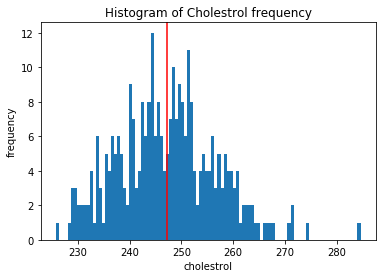

In [5]:
#We will take sample size=10, samples=300
#Calculate the arithmetice mean and plot the mean of sample 300 times

array = []
n = 300
for i in range(1,n):
    array.append(df_chol.sample(n=30,replace= True).mean())

#print(array)
plt.hist(array, bins=100)

plt.xlabel('cholestrol')
plt.ylabel('frequency')
plt.title('Histogram of Cholestrol frequency')
plt.axvline(x=np.mean(array),color='r') # for giving mean line

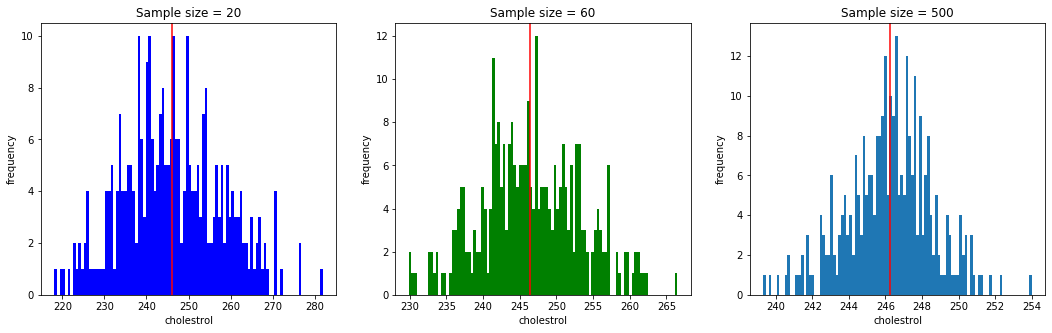

In [6]:
#We will take sample size=20, 60 & 500 samples=300
#Calculate the arithmetice mean and plot the mean of sample 300 times

array1 = []
array2 = []
array3 = []
n = 300
for i in range(1,n):
    array1.append(df_chol.sample(n=20,replace= True).mean())
    array2.append(df_chol.sample(n=60,replace= True).mean())
    array3.append(df_chol.sample(n=500,replace= True).mean())

#print(array)
fig , (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3,figsize=(18,5))
#plt.figure()

#plt.subplot(311)
ax1.hist(array1, bins=100,color='b')
ax1.set_xlabel('cholestrol')
ax1.set_ylabel('frequency')
ax1.set_title('Sample size = 20')
ax1.axvline(x=np.mean(array1),color='r') # for giving mean line

#ax2.subplot(312)
ax2.hist(array2, bins=100, color='g')
ax2.set_xlabel('cholestrol')
ax2.set_ylabel('frequency')
ax2.set_title('Sample size = 60')
ax2.axvline(x=np.mean(array2),color='r') # for giving mean line

#ax3.subplot(313)
ax3.hist(array3, bins=100)
ax3.set_xlabel('cholestrol')
ax3.set_ylabel('frequency')
ax3.set_title('Sample size = 500')
ax3.axvline(x=np.mean(array3),color='r') # for giving mean line

### Here, we get a good bell-shaped curve and the sampling distribution approaches normal distribution as the sample sizes increase.

In [ ]:
#----------------------------------------------------------------------------------------------------------------------

# Usage of Inferential Statistics to analyse NBA salaries

## Importing Libraries and Reading Data

In [4]:
#Libraries
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

#Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
#Reading CSV Dataset
df_NBA = pd.read_csv(r'../Downloads/NBA_season1718_salary.csv')
df_NBA.head()


,Unnamed: 0,Player,Tm,season17_18
0,1,Stephen Curry,GSW,34682550.0
1,2,LeBron James,CLE,33285709.0
2,3,Paul Millsap,DEN,31269231.0
3,4,Gordon Hayward,BOS,29727900.0
4,5,Blake Griffin,DET,29512900.0


In [6]:
#DF Key information
df_NBA.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 4 columns):
Unnamed: 0     573 non-null int64
Player         573 non-null object
Tm             573 non-null object
season17_18    573 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 18.0+ KB


In [7]:
#Renaming and deleting columns
df_NBA.columns = ['cod', 'player', 'team', 'salary']
del df_NBA['cod']
df_NBA.head()


,player,team,salary
0,Stephen Curry,GSW,34682550.0
1,LeBron James,CLE,33285709.0
2,Paul Millsap,DEN,31269231.0
3,Gordon Hayward,BOS,29727900.0
4,Blake Griffin,DET,29512900.0


 
## Visualizing players by team

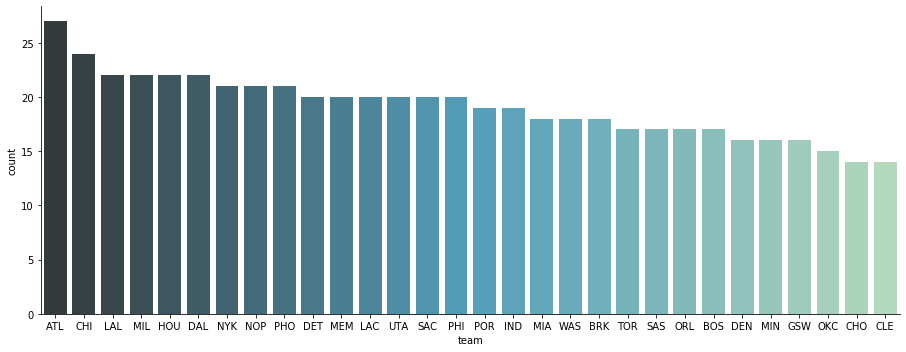

In [8]:
team_index = df_NBA['team'].value_counts()
sns.catplot(data=df_NBA,
            x='team',
            order=team_index.index,
            kind='count',
            aspect=2.5,
            palette='GnBu_d')

 ## Salary Distribution

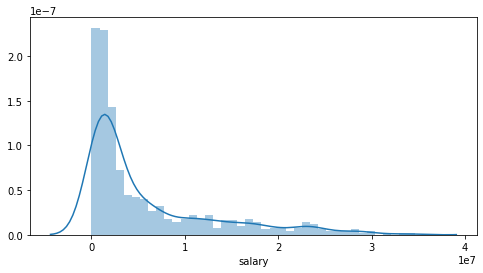

In [9]:
#Histogram and KDE
plt.figure(figsize=(8, 4))
sns.distplot(df_NBA['salary'], bins=40)


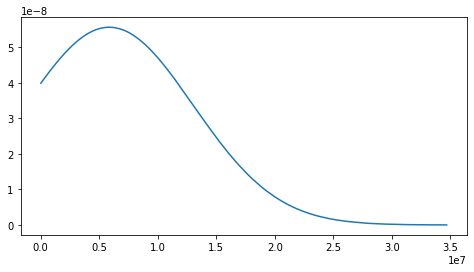

In [10]:
#Probability Density Function (PDF) Chart
x = df_NBA['salary']

plt.figure(figsize=(8, 4))
plt.plot(x, st.norm.pdf(x, x.mean(), x.std()))
plt.show()


## Normalizing the salary data

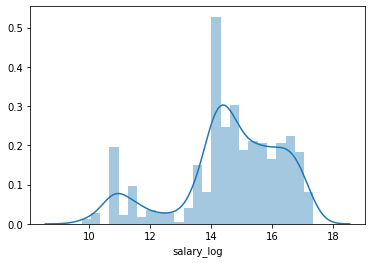

In [12]:
#Creating a column with the salary log to normalize the distribution
df_NBA['salary_log'] = np.log1p(df_NBA['salary'])
sns.distplot(df_NBA['salary_log'], bins=25)


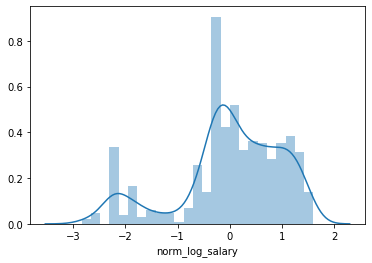

In [13]:
#Dividing by the mean and standard deviation to standardize the serie in a new column
df_NBA['norm_log_salary'] = ((df_NBA['salary_log'] - df_NBA['salary_log'].mean()) / df_NBA['salary_log'].std())
sns.distplot(df_NBA['norm_log_salary'], bins=25)


## Mean and Standard Deviation 

In [14]:
print(f"""Mean: {df_NBA.norm_log_salary.mean():.4f}
Standard: {df_NBA.norm_log_salary.std():.4f}""")


Mean: 0.0000
Standard: 1.0000


## P-Value to 2 std

In [15]:
norm_mean = df_NBA.norm_log_salary.mean()
norm_std = df_NBA.norm_log_salary.std()

p_value = st.norm(norm_mean, norm_std).sf(2*norm_std) * 2 #to sides
p_value


0.04550026389635878

## Calculating z-score

In [16]:
z_score_inf = st.norm.interval(alpha=0.95, loc=norm_mean, scale=norm_std)[0]
z_score_sup = st.norm.interval(alpha=0.95, loc=norm_mean, scale=norm_std)[1]

print(f'{z_score_inf:.4f} <--------> {z_score_sup:.4f}')


-1.9600 <--------> 1.9600


__With the Alpha limits of 0.95 we can run the inference and find out which players are earning above or below average with a 95% confidence level.__

## Hypothesis:

### __1. Lower than the average__

In [17]:
#Players
df_NBA_lower = df_NBA[df_NBA['norm_log_salary'] < z_score_inf]
df_NBA_lower


,player,team,salary,salary_log,norm_log_salary
528,Demetrius Jackson,HOU,74159.0,11.213980,-1.988587
529,Georgios Papagiannis,POR,74159.0,11.213980,-1.988587
530,Larry Drew,NOP,74159.0,11.213980,-1.988587
531,Scotty Hopson,DAL,74159.0,11.213980,-1.988587
532,Isaiah Canaan,HOU,53465.0,10.886801,-2.179385
533,Tyler Cavanaugh,ATL,50000.0,10.819798,-2.218459
534,Kyle Collinsworth,DAL,50000.0,10.819798,-2.218459
535,Demetrius Jackson,HOU,50000.0,10.819798,-2.218459
536,Daniel Ochefu,WAS,50000.0,10.819798,-2.218459
537,Michael Young,WAS,50000.0,10.819798,-2.218459


In [18]:
#Players by team
team_index = df_NBA_lower['team'].value_counts()
team_index


HOU    5
DAL    5
LAL    4
ATL    3
NOP    3
MIL    3
UTA    3
PHI    2
CHI    2
MEM    2
DET    2
WAS    2
POR    1
IND    1
MIA    1
BRK    1
ORL    1
NYK    1
LAC    1
TOR    1
CLE    1
Name: team, dtype: int64

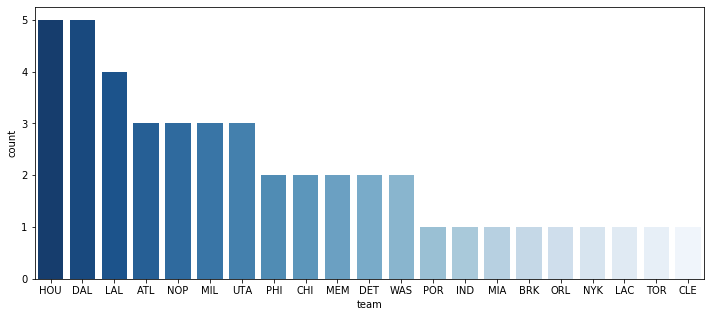

In [19]:
#Plot players by team
plt.figure(figsize=(12, 5))
sns.countplot(df_NBA_lower['team'],
              order=team_index.index,
              palette='Blues_r')

In [20]:
print(f"""Players with a lower salary than the average: 
Total - {df_NBA_lower.shape[0]}
Rate - {df_NBA_lower.shape[0] / df_NBA.shape[0] * 100:.2f}%""")


Players with a lower salary than the average: 
Total - 45
Rate - 7.85%


Based on that Dataset we can affirm with 95% certainty that There are currently __45 players__ earning less than the average salary. This represents a total of __7.85%__.
Therefore: **Fail to reject H0**

### __2. Higher than the average__

In [21]:
#Players
df_NBA_higher = df_NBA[df_NBA['norm_log_salary'] > z_score_sup]
df_NBA_higher


,player,team,salary,salary_log,norm_log_salary


In [22]:
print(f"""Players with a higher salary than the average: 
Total - {df_NBA_higher.shape[0]}
Rate - {df_NBA_higher.shape[0] / df_NBA.shape[0] * 100:.2f}%""")


Players with a higher salary than the average: 
Total - 0
Rate - 0.00%


In [23]:
#p-value and alpha max to the highest salary
p_value = st.norm(norm_mean, norm_std).sf(df_NBA['norm_log_salary'].max())
alpha = 1 - p_value
print(f'P-value: {p_value:.3f}\nAlpha Max: {alpha:.3f}\nWe can confirm that the highest salary is on the distribution!')


P-value: 0.055
Alpha Max: 0.945
We can confirm that the highest salary is on the distribution!


Based on that Dataset we can affirm with 95% certainty that currently there are __no__ players earning higher than the average salary. The highest salary is on the average distribution. Therefore: **Reject H0**